In [35]:
import pandas as pd
import numpy as np

In [36]:
Duffey_Tyler_2023_FF = pd.read_csv('Duffey_Tyler_2023_FF.csv')
print(Duffey_Tyler_2023_FF.head())

  pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2023-10-01           91.3          -2.86           5.67   
1         FF  2023-10-01           91.3          -3.09           5.70   
2         FF  2023-10-01           91.3          -2.93           5.76   
3         FF  2023-10-01           92.5          -2.79           5.59   
4         FF  2023-10-01           92.8          -3.00           5.60   

     player_name  batter  pitcher     events    description  ...  \
0  Duffey, Tyler  668930   608648        NaN           foul  ...   
1  Duffey, Tyler  668930   608648        NaN           ball  ...   
2  Duffey, Tyler  668930   608648        NaN           foul  ...   
3  Duffey, Tyler  621438   608648        NaN           ball  ...   
4  Duffey, Tyler  669003   608648  field_out  hit_into_play  ...   

   post_home_score  post_bat_score  post_fld_score  if_fielding_alignment  \
0                4               4               0               Standard  

In [37]:
#############################################
## NEED TO CALCULATE FOR SEAMLAT & SEAMLON ##
#############################################

Duffey_Tyler_2023_FF = Duffey_Tyler_2023_FF[['pitch_type', 'player_name', 'release_speed', 'release_spin_rate', 'release_pos_z', 'release_pos_x',
                                               'plate_z', 'plate_x', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az']]
print(Duffey_Tyler_2023_FF.head())

  pitch_type    player_name  release_speed  release_spin_rate  release_pos_z  \
0         FF  Duffey, Tyler           91.3               2205           5.67   
1         FF  Duffey, Tyler           91.3               2207           5.70   
2         FF  Duffey, Tyler           91.3               2263           5.76   
3         FF  Duffey, Tyler           92.5               2162           5.59   
4         FF  Duffey, Tyler           92.8               2199           5.60   

   release_pos_x  plate_z  plate_x        vx0         vy0       vz0        ax  \
0          -2.86     3.49     0.28   8.354891 -132.754211 -1.835452 -3.951627   
1          -3.09     4.45    -1.75   4.131930 -132.959095  1.080506 -4.897632   
2          -2.93     3.31    -0.66   5.927158 -132.965780 -2.514443 -2.176813   
3          -2.79     1.89     1.15  10.572626 -134.236183 -6.175608 -4.856770   
4          -3.00     3.37     0.23   8.819918 -134.955198 -2.324559 -4.724347   

          ay         az  
0  28.

In [38]:
######################################
## CALCULATE SPIN X, SPIN Y, SPIN Z ##
######################################

def calculate_spin_components(data):
    
    # Extract necessary columns from the data
    vx0 = data["vx0"]
    vy0 = data["vy0"]
    vz0 = data["vz0"]
    ax = data["ax"]
    ay = data["ay"]
    az = data["az"]
    
    # Calculate velocity and acceleration magnitudes
    velocity_magnitude = np.sqrt(vx0**2 + vy0**2 + vz0**2)
    acceleration_magnitude = np.sqrt(ax**2 + ay**2 + az**2)
    
    # Calculate velocity and acceleration unit vectors
    velocity_unit_x = vx0 / velocity_magnitude
    velocity_unit_y = vy0 / velocity_magnitude
    velocity_unit_z = vz0 / velocity_magnitude
    acceleration_unit_x = ax / acceleration_magnitude
    acceleration_unit_y = ay / acceleration_magnitude
    acceleration_unit_z = az / acceleration_magnitude

    # Calculate spin axis components
    SpinX = velocity_unit_y * acceleration_unit_z - velocity_unit_z * acceleration_unit_y
    SpinY = velocity_unit_z * acceleration_unit_x - velocity_unit_x * acceleration_unit_z
    SpinZ = velocity_unit_x * acceleration_unit_y - velocity_unit_y * acceleration_unit_x
    
    # Normalize spin axis components
    spin_magnitude = np.sqrt(SpinX**2 + SpinY**2 + SpinZ**2)
    SpinX = SpinX / spin_magnitude
    SpinY = SpinY / spin_magnitude
    SpinZ = SpinZ / spin_magnitude
    
    return SpinX, SpinY, SpinZ

spin_x, spin_y, spin_z = calculate_spin_components(Duffey_Tyler_2023_FF)
    
# Add spin axis components to the DataFrame
Duffey_Tyler_2023_FF["SpinX"] = spin_x
Duffey_Tyler_2023_FF["SpinY"] = spin_y
Duffey_Tyler_2023_FF["SpinZ"] = spin_z



In [39]:
def calculate_spin_axis(data):
    SpinX = data["SpinX"]
    SpinY = data["SpinY"]
    SpinZ = data["SpinZ"]
    
    spin = np.column_stack((SpinX, SpinY, SpinZ))
    
    return spin

spin = calculate_spin_axis(Duffey_Tyler_2023_FF)

# Add spin axis to the DataFrame
Duffey_Tyler_2023_FF["spin"] = list(spin)
print(Duffey_Tyler_2023_FF.head())

  pitch_type    player_name  release_speed  release_spin_rate  release_pos_z  \
0         FF  Duffey, Tyler           91.3               2205           5.67   
1         FF  Duffey, Tyler           91.3               2207           5.70   
2         FF  Duffey, Tyler           91.3               2263           5.76   
3         FF  Duffey, Tyler           92.5               2162           5.59   
4         FF  Duffey, Tyler           92.8               2199           5.60   

   release_pos_x  plate_z  plate_x        vx0         vy0       vz0        ax  \
0          -2.86     3.49     0.28   8.354891 -132.754211 -1.835452 -3.951627   
1          -3.09     4.45    -1.75   4.131930 -132.959095  1.080506 -4.897632   
2          -2.93     3.31    -0.66   5.927158 -132.965780 -2.514443 -2.176813   
3          -2.79     1.89     1.15  10.572626 -134.236183 -6.175608 -4.856770   
4          -3.00     3.37     0.23   8.819918 -134.955198 -2.324559 -4.724347   

          ay         az     Spin

In [71]:
def getSimpleLatLon(hawkeyeRotMat, spin):
    spinAxis = spin / (np.linalg.norm(spin) + 1e-9)
    inverseHawkeyeRotMat = np.linalg.inv(hawkeyeRotMat)

    # Rotate the spin axis from global coordinates to local coordinates
    rotatedSpinAxis = np.dot(inverseHawkeyeRotMat, spinAxis)

    # Convert between Trajekt and Hawkeye reference frames (x = -z, y = x, z = -y)
    x, y, z = -rotatedSpinAxis[2], rotatedSpinAxis[0], -rotatedSpinAxis[1]
    return {
        "lon": np.degrees(np.arctan2(y, x)),
        "lat": np.degrees(np.pi/2 - np.arccos(z))
    }

# Function to create a rotation matrix for a given angle around the Z-axis
def create_z_rotation_matrix(theta_degrees):
    theta = np.radians(theta_degrees)
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Function to calculate seam orientation for a given angle
def calculate_seam_orientation_for_angle(df, angle):
    hawkeyeRotMat = create_z_rotation_matrix(angle)
    def calculate_seam_orientation(row):
        spin = np.array([row['SpinX'], row['SpinY'], row['SpinZ']])
        result = getSimpleLatLon(hawkeyeRotMat, spin)
        return pd.Series(result)
    temp_df = df.copy()
    temp_df[['lon', 'lat']] = temp_df.apply(calculate_seam_orientation, axis=1)
    return temp_df['lon'].mean(), temp_df['lat'].mean()

# Define the range of angles to test
angles = range(-10, 11, 1)

# Expected values for comparison
expected_lon = 10.4
expected_lat = -4.4

# Find the optimal angle
optimal_angle = None
min_difference = float('inf')

for angle in angles:
    mean_lon, mean_lat = calculate_seam_orientation_for_angle(Duffey_Tyler_2023_FF, angle)
    difference = np.abs(mean_lon - expected_lon) + np.abs(mean_lat - expected_lat)
    if difference < min_difference:
        min_difference = difference
        optimal_angle = angle

print(f"Optimal Angle: {optimal_angle}°")

# Calculate the seam orientation with the optimal angle
hawkeyeRotMat = create_z_rotation_matrix(optimal_angle)
Duffey_Tyler_2023_FF[['SeamLon', 'SeamLat']] = Duffey_Tyler_2023_FF.apply(lambda row: pd.Series(getSimpleLatLon(hawkeyeRotMat, np.array([row['SpinX'], row['SpinY'], row['SpinZ']])), axis=1))

print(Duffey_Tyler_2023_FF.head())


Optimal Angle: 0°


KeyError: 'SpinX'

In [66]:
def getSimpleLatLon(hawkeyeRotMat, spin):
    spinAxis = spin / (np.linalg.norm(spin) + 1e-9)
    inverseHawkeyeRotMat = np.linalg.inv(hawkeyeRotMat)

    # Rotate the spin axis from global coordinates to local coordinates
    rotatedSpinAxis = np.dot(inverseHawkeyeRotMat, spinAxis)

    # Convert between Trajekt and Hawkeye reference frames (x = -z, y = x, z = -y)
    x, y, z = -rotatedSpinAxis[2], rotatedSpinAxis[0], -rotatedSpinAxis[1]
    return {
        "lon": np.degrees(np.arctan2(y, x)),
        "lat": np.degrees(np.pi/2 - np.arccos(z))
    }

# Function to create a rotation matrix for a given angle around the Z-axis
def create_z_rotation_matrix(theta_degrees):
    theta = np.radians(theta_degrees)
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

# Assume you've fine-tuned this angle through previous testing
optimal_angle = 5  # Replace this with your optimal angle found
hawkeyeRotMat = create_z_rotation_matrix(optimal_angle)

# Function to apply to each row
def calculate_seam_orientation(row):
    spin = np.array([row['SpinX'], row['SpinY'], row['SpinZ']])
    result = getSimpleLatLon(hawkeyeRotMat, spin)
    return pd.Series(result)

# Apply the function to each row in the dataframe
Duffey_Tyler_2023_FF[['SeamLon', 'SeamLat']] = Duffey_Tyler_2023_FF.apply(calculate_seam_orientation, axis=1)


In [67]:
print(Duffey_Tyler_2023_FF.head())

  pitch_type    player_name  release_speed  release_spin_rate  release_pos_z  \
0         FF  Duffey, Tyler           91.3               2205           5.67   
1         FF  Duffey, Tyler           91.3               2207           5.70   
2         FF  Duffey, Tyler           91.3               2263           5.76   
3         FF  Duffey, Tyler           92.5               2162           5.59   
4         FF  Duffey, Tyler           92.8               2199           5.60   

   release_pos_x  plate_z  plate_x        vx0         vy0       vz0        ax  \
0          -2.86     3.49     0.28   8.354891 -132.754211 -1.835452 -3.951627   
1          -3.09     4.45    -1.75   4.131930 -132.959095  1.080506 -4.897632   
2          -2.93     3.31    -0.66   5.927158 -132.965780 -2.514443 -2.176813   
3          -2.79     1.89     1.15  10.572626 -134.236183 -6.175608 -4.856770   
4          -3.00     3.37     0.23   8.819918 -134.955198 -2.324559 -4.724347   

          ay         az     Spin

In [61]:
def getSimpleLatLon(spin):
    spinAxis = spin / (np.linalg.norm(spin) + 1e-9)
    
    # Assume an identity matrix for hawkeyeRotMat
    hawkeyeRotMat = np.eye(3)
    inverseHawkeyeRotMat = hawkeyeRotMat  # Identity matrix is its own inverse
    
    # Rotate the spin axis from global coordinates to local coordinates
    rotatedSpinAxis = np.dot(inverseHawkeyeRotMat, spinAxis)
    
    # Convert between Trajekt and Hawkeye reference frames (x = -z, y = x, z = -y)
    x, y, z = -rotatedSpinAxis[2], rotatedSpinAxis[0], -rotatedSpinAxis[1]
    
    return {
        "lon": np.degrees(np.arctan2(y, x)),
        "lat": np.degrees(np.pi/2 - np.arccos(z))
    }
    
Duffey_Tyler_2023_FF["SeamLat"] = Duffey_Tyler_2023_FF["spin"].apply(lambda spin: getSimpleLatLon(np.array(spin))["lat"])
Duffey_Tyler_2023_FF["SeamLon"] = Duffey_Tyler_2023_FF["spin"].apply(lambda spin: getSimpleLatLon(np.array(spin))["lon"])
print(Duffey_Tyler_2023_FF.head())

  pitch_type    player_name  release_speed  release_spin_rate  release_pos_z  \
0         FF  Duffey, Tyler           91.3               2205           5.67   
1         FF  Duffey, Tyler           91.3               2207           5.70   
2         FF  Duffey, Tyler           91.3               2263           5.76   
3         FF  Duffey, Tyler           92.5               2162           5.59   
4         FF  Duffey, Tyler           92.8               2199           5.60   

   release_pos_x  plate_z  plate_x        vx0         vy0       vz0        ax  \
0          -2.86     3.49     0.28   8.354891 -132.754211 -1.835452 -3.951627   
1          -3.09     4.45    -1.75   4.131930 -132.959095  1.080506 -4.897632   
2          -2.93     3.31    -0.66   5.927158 -132.965780 -2.514443 -2.176813   
3          -2.79     1.89     1.15  10.572626 -134.236183 -6.175608 -4.856770   
4          -3.00     3.37     0.23   8.819918 -134.955198 -2.324559 -4.724347   

          ay         az     Spin

In [62]:
SeamLat_mean = Duffey_Tyler_2023_FF["SeamLat"].mean()
SeamLon_mean = Duffey_Tyler_2023_FF["SeamLon"].mean()

In [63]:
print(SeamLat_mean)
print(SeamLon_mean)

-4.024916045334758
77.13205943198697


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_baseball_seam_orientation(SeamLat_mean, SeamLon_mean):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = 10 * np.outer(np.cos(u), np.sin(v))  # Scale the sphere up for better visibility
    y = 10 * np.outer(np.sin(u), np.sin(v))
    z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the sphere
    ax.plot_surface(x, y, z, color='b', alpha=0.3, linewidth=0)

    # Convert seam orientation from degrees to radians
    SeamLat_rad = np.radians(SeamLat_mean)
    SeamLon_rad = np.radians(SeamLon_mean)

    # Calculate the seam orientation vector
    seam_x = np.cos(SeamLon_rad) * np.cos(SeamLat_rad)
    seam_y = np.sin(SeamLon_rad) * np.cos(SeamLat_rad)
    seam_z = np.sin(SeamLat_rad)

    # Plot the seam orientation vector
    length = 20  # Make the line longer for better visibility
    ax.quiver(0, 0, 0, seam_x * length, seam_y * length, seam_z * length, color='red', linewidth=2, arrow_length_ratio=0.05)

    # Set plot limits and labels
    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_zlim(-15, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("Baseball Seam Orientation")
    plt.tight_layout()
    plt.show()

# Example usage
SeamLat_mean = Duffey_Tyler_2023_FF["SeamLat"].mean()
SeamLon_mean = Duffey_Tyler_2023_FF["SeamLon"].mean()
plot_baseball_seam_orientation(SeamLat_mean, SeamLon_mean)


TypeError: 'SeamLat_mean' is an invalid keyword argument for print()

In [9]:
print(SeamLat_mean = Duffey_Tyler_2022_FF["SeamLat"].mean())
print(SeamLon_mean = Duffey_Tyler_2022_FF["SeamLon"].mean())

TypeError: 'SeamLat_mean' is an invalid keyword argument for print()

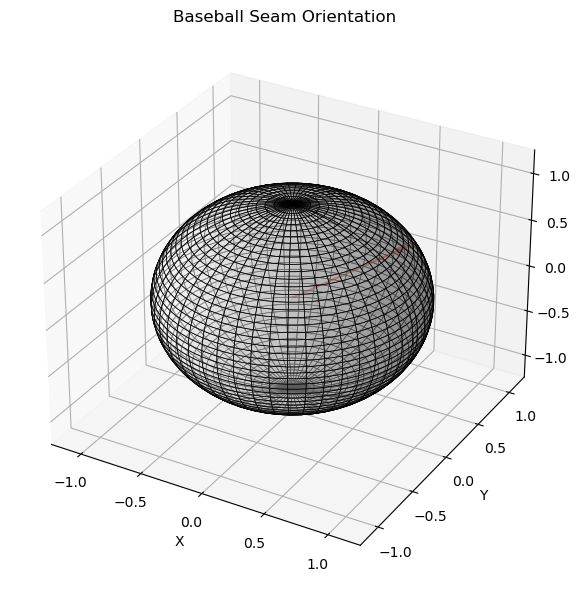

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_baseball_seam_orientation(SeamLat, SeamLon):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Create a sphere representing the baseball
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))

    # Plot the baseball surface
    ax.plot_surface(x, y, z, color='white', edgecolor='black', linewidth=0.5, alpha=0.5)

    # Convert seam orientation from degrees to radians
    SeamLat_rad = np.radians(SeamLat)
    SeamLon_rad = np.radians(SeamLon)

    # Calculate the seam orientation vector
    seam_x = np.cos(SeamLon_rad) * np.cos(SeamLat_rad)
    seam_y = np.sin(SeamLon_rad) * np.cos(SeamLat_rad)
    seam_z = np.sin(SeamLat_rad)

    # Plot the seam orientation vector
    ax.quiver(0, 0, 0, seam_x, seam_y, seam_z, color='red', length=1.2, arrow_length_ratio=0.1)

    # Set plot limits and labels
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_zlim(-1.2, 1.2)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.title("Baseball Seam Orientation")
    plt.tight_layout()
    plt.show()

# Example usage
SeamLat_mean = Duffey_Tyler_2022_FF["SeamLat"].mean()
SeamLon_mean = Duffey_Tyler_2022_FF["SeamLon"].mean()
plot_baseball_seam_orientation(SeamLat_mean, SeamLon_mean)

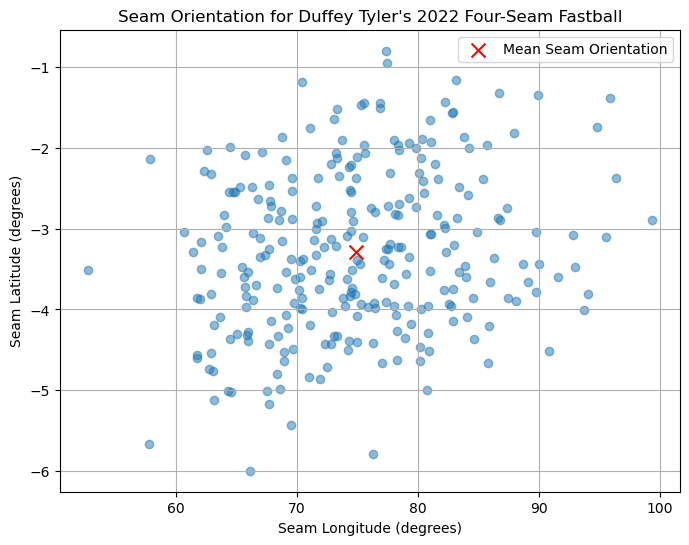

In [35]:
SeamLat_mean = Duffey_Tyler_2022_FF["SeamLat"].mean()
SeamLon_mean = Duffey_Tyler_2022_FF["SeamLon"].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Duffey_Tyler_2022_FF["SeamLon"], Duffey_Tyler_2022_FF["SeamLat"], alpha=0.5)
plt.scatter(SeamLon_mean, SeamLat_mean, color="red", marker="x", s=100, label="Mean Seam Orientation")
plt.xlabel("Seam Longitude (degrees)")
plt.ylabel("Seam Latitude (degrees)")
plt.title("Seam Orientation for Duffey Tyler's 2022 Four-Seam Fastball")
plt.legend()
plt.grid(True)
plt.show()

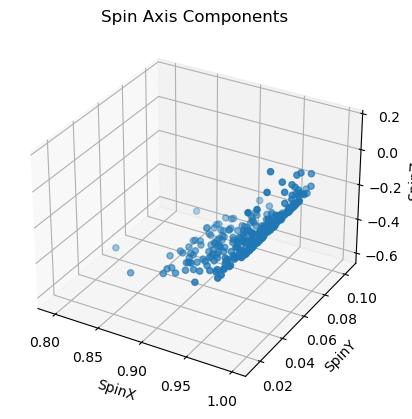

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_spin_axis(data):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract spin axis components from the DataFrame
    SpinX = data["SpinX"]
    SpinY = data["SpinY"]
    SpinZ = data["SpinZ"]
    
    # Plot the spin axis components as a 3D scatter plot
    ax.scatter(SpinX, SpinY, SpinZ)
    
    # Set labels for the axes
    ax.set_xlabel('SpinX')
    ax.set_ylabel('SpinY')
    ax.set_zlabel('SpinZ')
    
    # Set title for the plot
    ax.set_title('Spin Axis Components')
    
    plt.show()

# Call the function to visualize the spin axis components
visualize_spin_axis(Duffey_Tyler_2022_FF)

ValueError: shapes (3,3) and (3,100,100) not aligned: 3 (dim 1) != 100 (dim 1)

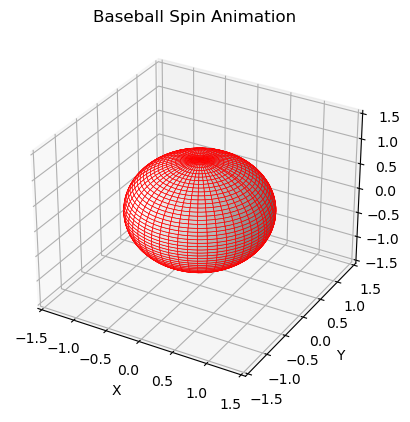

In [15]:
Duffey_Tyler_2022_FF.to_csv('with_spins.csv', index=False)